<a href="https://colab.research.google.com/github/AshwathElango0/Epoch-Tasks/blob/main/task_1/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary installations and imports

In [ ]:
 !pip install cartopy geopandas shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 72.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import cartopy.crs as ccrs
import geopandas as gpd
import shapely
from shapely.geometry import Point

# Loading and processing data from .csv file

In [ ]:
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'       #This environment variable had to be set to 'YES' to avoid error

In [ ]:
state_shape = gpd.read_file("/content/TAMIL NADU_DISTRICTS.shp")    #Reading a shape file of Tamil Nadu

In [ ]:
df = pd.read_csv('clustering_data.csv')           #Reading .csv file with data
df.head()

<ipython-input-6-f4b9cc155d4f>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clustering_data.csv')           #Reading .csv file with data


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [ ]:
df.iloc[:, 0].unique()        #Identifying keys

array(['Andhra Pradesh Circle', 'Bihar Circle', 'Telangana Circle',
       'Rajasthan Circle', 'Punjab Circle', 'Assam Circle',
       'Uttar Pradesh Circle', 'Karnataka Circle',
       'Madhya Pradesh Circle', 'Jharkhand Circle', 'Odisha Circle',
       'Maharashtra Circle', 'Gujarat Circle', 'Chattisgarh Circle',
       'Tamilnadu Circle', 'West Bengal Circle',
       'Himachal Pradesh Circle', 'Haryana Circle', 'Kerala Circle',
       'Delhi Circle', 'Jammukashmir Circle', 'North Eastern Circle',
       'Uttarakhand Circle', 'APS CIRCLE'], dtype=object)

In [ ]:
df = df[df['CircleName'] == 'Tamilnadu Circle']       #Extracting rows flagged for Tamil Nadu
len(df)

11885

In [ ]:
def convert_to_num(value):        #Function to remove non-numeric characters from co-ordinates appropriately
  value = re.sub(r'[^\d.]', '', str(value))
  if value == '':
    return np.nan               #Replacing corrupted rows with no co-ordinates with NaN values
  return float(value)

In [ ]:
df['Latitude'] = df['Latitude'].apply(convert_to_num)       #Converting co-ordinates to numeric format
df['Longitude'] = df['Longitude'].apply(convert_to_num)

In [ ]:
df = df.dropna()        #Dropping NaN values
len(df)

11875

In [ ]:
df = df.drop_duplicates(subset=['Latitude', 'Longitude', 'Pincode'])      #Dropping duplicate values
len(df)

10966

In [ ]:
geometry = [Point(latlong) for latlong in zip(df['Longitude'], df['Latitude'])]     #Converting numeric coordinates into POINT objects
gdf = gpd.GeoDataFrame(df, geometry=geometry)             #Creating a geodataframe
gdf.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude,geometry
1733,Tamilnadu Circle,"Central Region, Trichirapalli",Tiruchirapalli Division,ETTARAI S.O.,639103,PO,Non Delivery,TIRUCHIRAPPALLI,TAMIL NADU,10.845278,78.596389,POINT (78.59639 10.84528)
2886,Tamilnadu Circle,"Western Region, Coimbatore",Salem West Division,TEST OFFICE,999999,PO,Delivery,NIZAMABAD,TELANGANA,11.683720,77.928465,POINT (77.92847 11.68372)
5428,Tamilnadu Circle,Chennai City Region,Pondicherry Division,Valudareddy S.O,605403,PO,Delivery,VILLUPURAM,TAMIL NADU,12.067166,79.395827,POINT (79.39583 12.06717)
5900,Tamilnadu Circle,"Western Region, Coimbatore",Dharmapuri Division,Dharmapuri Combined Court Building S. O,636705,PO,Non Delivery,DHARMAPURI,TAMIL NADU,12.093300,78.202000,POINT (78.20200 12.09330)
15612,Tamilnadu Circle,Chennai City Region,Tambaram Division,Perumbakkam S.O,600100,PO,Non Delivery,CHENGALPATTU,TAMIL NADU,12.905914,80.201454,POINT (80.20145 12.90591)


In [ ]:
gdf = gdf.set_crs(epsg=4326, inplace=True)      #Setting of crs is necessary for the geodataframe

In [ ]:
points_df = gdf.sjoin(state_shape, how='inner', op='within')    #Performing a spatial join to remove all points outside state boundaries
len(points_df)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2177: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


10347

# Data visualisation and clustering

In [ ]:
latitudes = points_df['Latitude'].values            #Preparing data arrays
longitudes = points_df['Longitude'].values
pincodes = points_df['Pincode'].values
data = np.vstack((latitudes, longitudes)).T

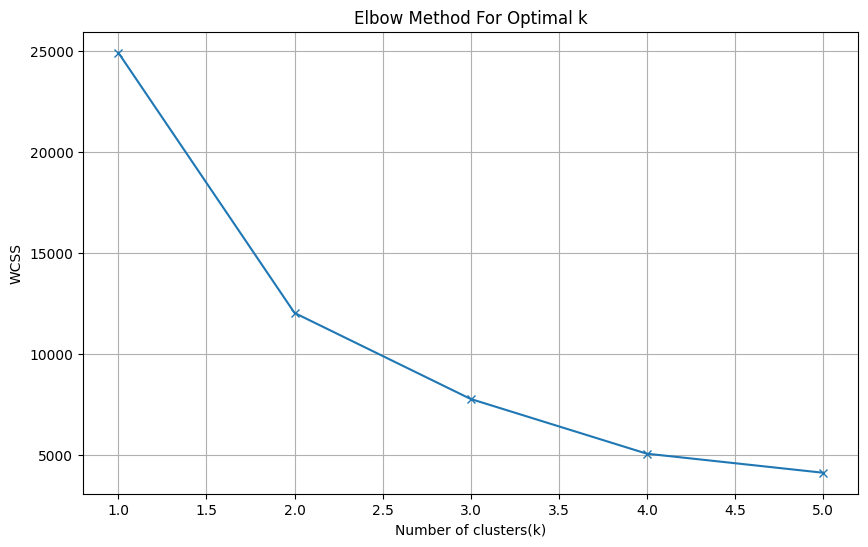

In [ ]:
def calculate_wcss(data, kmeans_func, k_range):   #Function to calculate Within-Cluster Sum of Squares, used to determine appropriate number of clusters
    wcss = []
    for k in k_range:
        centroids, labels = kmeans_func(data, k)
        wcss_k = 0

        for i in range(k):                      #Calculate WCSS for each cluster
            cluster_points = data[labels == i]
            wcss_k += np.sum((cluster_points - centroids[i])**2)
        wcss.append(wcss_k)
    return wcss

def kmeans_clustering(data, k, max_iters=100):            #Clustering function, can have a maximum of 100 iterations
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]   #randomly initialising centroids
    for _ in range(max_iters):
        distances = np.zeros((data.shape[0], k))        #Initialising an array to store distances from each point to each centroid
        for i in range(k):
            for j in range(data.shape[0]):
                distances[j, i] = np.sum((data[j] - centroids[i])**2)     #Storing squares of distances as all quanitites are positive...no need to use a sqrt operation

        labels = np.argmin(distances, axis=1)         #Array which denotes the centroid each point is assigned to
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])    #Recalculating centroids' positions by averaging co-ordinates of corresponding points

        if np.allclose(new_centroids, centroids):     #Stopping centroid recalculation early if there is negligible change
            break

        centroids = new_centroids     #Updating centroids

    return centroids, labels

#Plotting elbow graph for k values 1, 2, 3, 4, 5
k_range = range(1, 6)

#Calculating WCSS for each k
wcss = calculate_wcss(data, kmeans_clustering, k_range)

#Plotting results
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='x')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
k = 2         #Picking elbow point as optimal value of k
centroids, labels = kmeans_clustering(data, k)
centroids, labels

(array([[ 9.99180701, 77.8244487 ],
        [11.82439523, 79.10451117]]),
 array([1, 1, 1, ..., 0, 0, 0]))

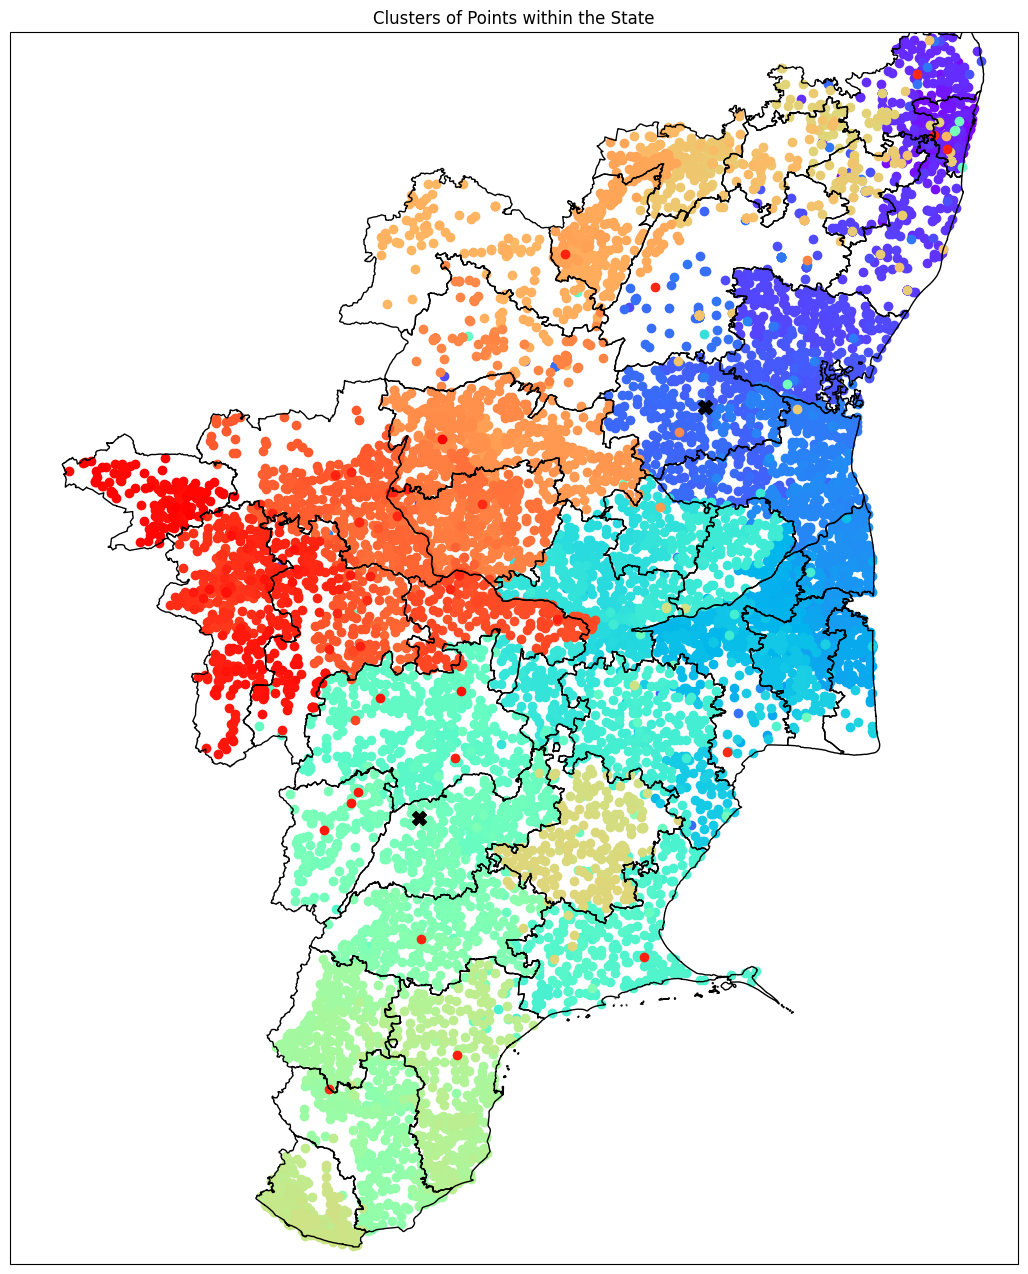

In [ ]:
plt.figure(figsize=(24, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
#Plotting state boundaries and using a mapping transform to plot points using lat-long values
state_shape.boundary.plot(ax=ax, edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())
#Creating a color map for the pincodes
unique_pincodes = np.unique(pincodes)   #Pincodes closer to each other numerically have similar colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_pincodes)))
pincode_color_map = {pincode: colors[i] for i, pincode in enumerate(unique_pincodes)}

for pincode in unique_pincodes:
    points = data[pincodes == pincode]
    color = pincode_color_map[pincode]
    plt.scatter(points[:, 1], points[:, 0], color=color, label=f'Pincode {pincode}')

#Plotting centroids
plt.scatter(centroids[:, 1], centroids[:, 0], s=100, c='black', marker='X', label='Centroids')

#Configuring map features
ax.set_extent([76, 80.5, 8, 13.5], crs=ccrs.PlateCarree())
plt.title('Clusters of Points within the State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
#Taking average co-ordinates of all Pincodes
agg_df = points_df.groupby(['Pincode']).agg({'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()
agg_df = agg_df.sort_values(by='Pincode')
len(agg_df)

2019

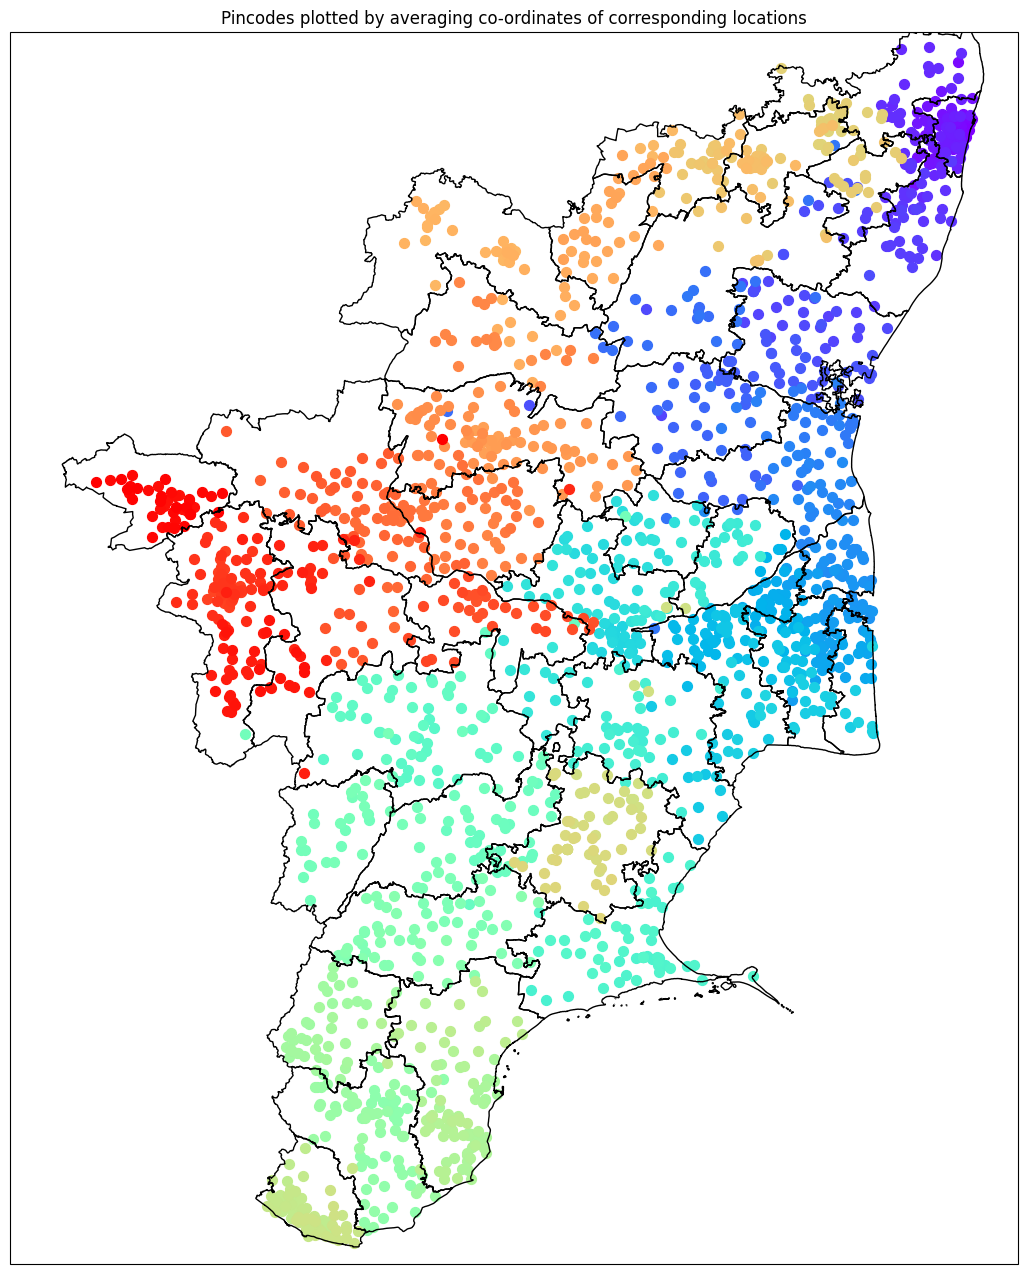

In [ ]:
plt.figure(figsize=(24, 16))    #Plotting average co-ordinates of all pincodes
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([76, 80.5, 8, 13.5], crs=ccrs.PlateCarree())

state_shape.boundary.plot(ax=ax, edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())

for pincode in agg_df['Pincode'].values:
  point = agg_df[agg_df['Pincode'] == pincode]
  plt.scatter(point['Longitude'], point['Latitude'], color=pincode_color_map[pincode], label=f'Pincode {pincode}', s=50, transform=ccrs.PlateCarree())

plt.title('Pincodes plotted by averaging co-ordinates of corresponding locations')
plt.show()

Inferences:
1. There are a greater number of pincodes in areas of dense population, industrialization, business, tourism, etc.
2. There are fewer pincodes in the hilly regions and rural areas in the west of the state.
3. As seen my similar colors being grouped together on the map, the distribution and numbering of pincodes is not random and is systematic.